# **Refactor Academy - Project 1**

### Pre Process (importing the data, tasks before EDA.)

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
%matplotlib inline

In [2]:
gdown.download(id='1fK_dvo7wnwo63yfl8obqBhzwcEMD9Rar')

Downloading...
From: https://drive.google.com/uc?id=1fK_dvo7wnwo63yfl8obqBhzwcEMD9Rar
To: /content/Ecommerce Customers.csv
100%|██████████| 87.4k/87.4k [00:00<00:00, 27.5MB/s]


'Ecommerce Customers.csv'

In [3]:
df = pd.read_csv("/content/Ecommerce Customers.csv")

In [4]:
df.shape

(500, 8)

In [5]:
df.head(4)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
df.info() # all obj is in object and all nums are in float...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


* all obj is in object and all nums are in float...
* no worries on null values too.

In [8]:
# email and address are unique features, it dose not have a lot of meaning to the data so we are droping them.
del df['Email']
del df['Address']
df.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Feature "Avatar"

In [9]:
df['Avatar'].value_counts()

SlateBlue               7
Cyan                    7
CadetBlue               7
GreenYellow             7
Teal                    7
                       ..
MediumPurple            1
CornflowerBlue          1
LightGoldenRodYellow    1
PowderBlue              1
LawnGreen               1
Name: Avatar, Length: 138, dtype: int64

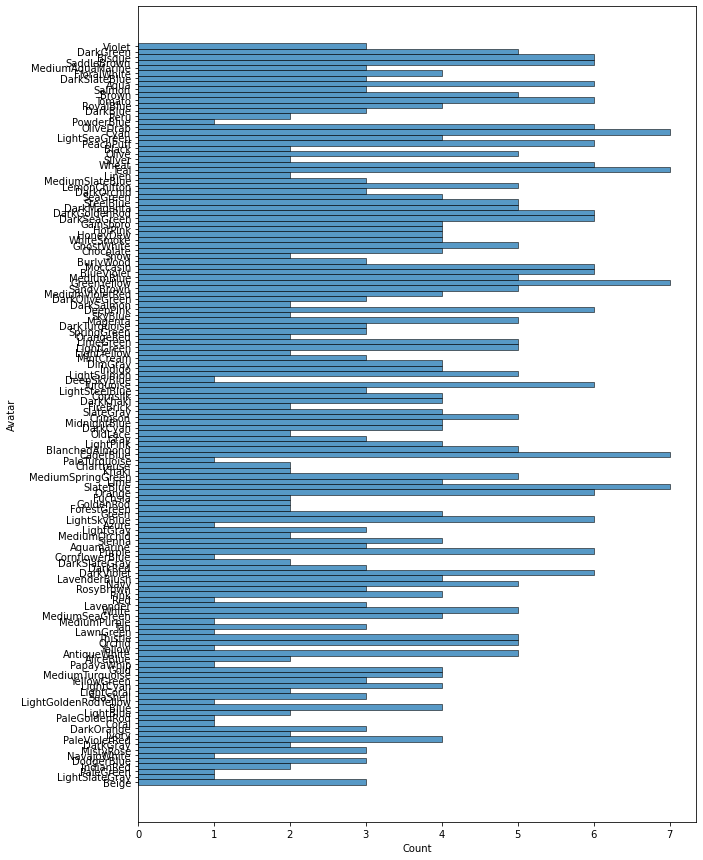

In [10]:
plt.figure(figsize = (10,15))# max count is 7 and we still see a uniform distribution or a very less right skew... 
sns.histplot(y = df['Avatar'], element="bars")

In [11]:
c_names = df['Avatar'].value_counts().index.tolist()
c_counts = df['Avatar'].value_counts().tolist()
value = dict(zip(c_names, c_counts))
len(value)

138

In [12]:
df['colour_count']= df['Avatar'].replace(value)

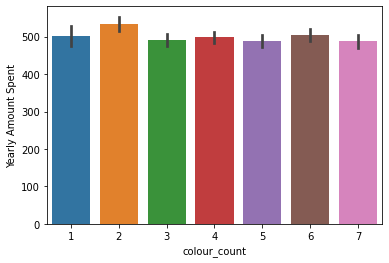

In [13]:
sns.barplot(x=df['colour_count'],y=df['Yearly Amount Spent']) 

* we have done this plot just to find the frequency dist.
* more than the above plot this plot clearly explains the uniform distribution, but on the count values.
* if we understand the plot better, 

( " The profits madeby the colors with freq of count 1 = The profits madeby the colour with freq of count 7. )
* we conclude that the data is uniformly distributed.
* we are droping this feature as no linear relationship exits with amt spent.
* we will have to make 138 columns out of this column (one hot encode...)

In [14]:
del df['colour_count']

In [15]:
df.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

### "Avg. Session Length"

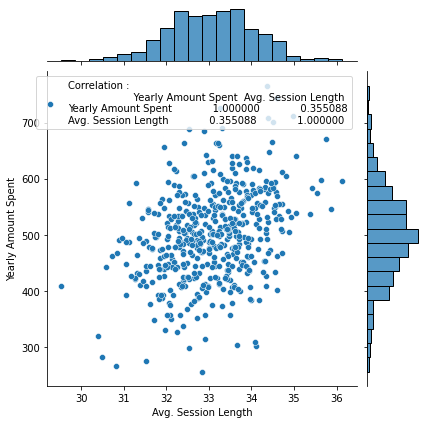

In [16]:
lab = df[['Yearly Amount Spent','Avg. Session Length']].corr()
sns.jointplot(x='Avg. Session Length',y ='Yearly Amount Spent', data = df,label = f'Correlation : \n{lab}')

* in both we see a normal distribution.
* but in terms of relationship we dont find a strong line. There is a good spread.
* still we can find the corrlation to be 0.35

### Time on App 

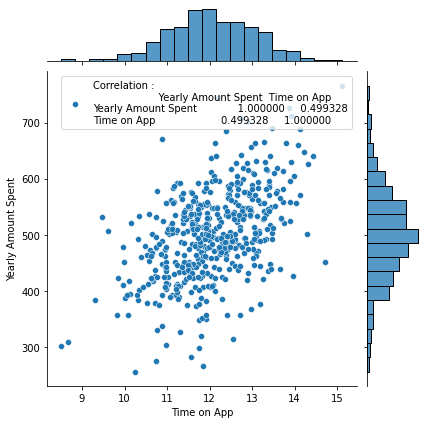

In [17]:
lab = df[['Yearly Amount Spent','Time on App']].corr()
sns.jointplot(x='Time on App',y ='Yearly Amount Spent', data = df,label = f'Correlation : \n{lab}')

* The dist is again normal.
* we definately see a better line than the previous plot.
* corr is 0.49 which is definately good.

In [18]:
df.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

### Time on Website

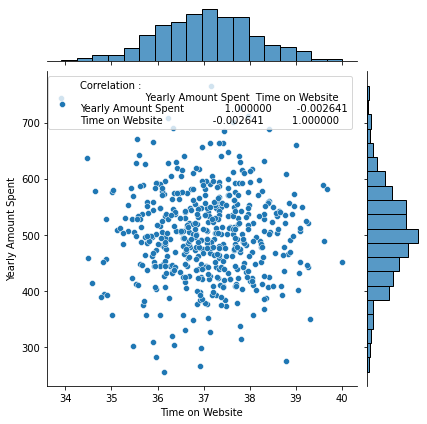

In [19]:
lab = df[['Yearly Amount Spent','Time on Website']].corr()
sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data = df,label = f'Correlation : \n{lab}')

* This feature has no corrlation. 
* we will try transforming.

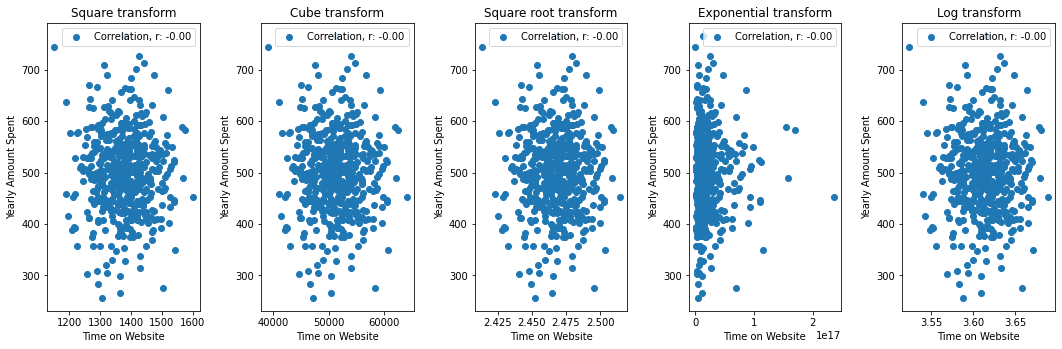

In [20]:
def plot():
  r = df[['Transformed', 'Yearly Amount Spent']].corr()
  r = float(r['Yearly Amount Spent'][0])
  plt.scatter(df['Transformed'], df['Yearly Amount Spent'], label = 'Correlation, r: {:.2f}'.format(r))
  plt.xlabel('Time on Website')
  plt.ylabel('Yearly Amount Spent')
  plt.legend()
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)

j = 0
plt.figure(figsize = (17.5,5))

for i in range(5):
  plt.subplot(1,5,j+1)
  if i== 0:
    df['Transformed'] = np.square(df['Time on Website'])
    plt.title('Square transform')
    plot()
  elif i ==1 :
    df['Transformed'] = np.power(df['Time on Website'], 3)
    plt.title('Cube transform')
    plot()
  elif i == 2:
    df['Transformed'] = np.power(df['Time on Website'], 0.25)
    plt.title('Square root transform')
    plot()
  elif i == 3:
    df['Transformed'] = np.exp(df['Time on Website'])
    plt.title('Exponential transform')
    plot()
  else:
    df['Transformed'] = np.log(df['Time on Website'])
    plt.title('Log transform')
    plot()
  j+=1

* No transformation improved the correlation.
* we are droping this feature.

In [21]:
del df['Time on Website']
del df['Transformed']

In [22]:
df.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Length of Membership',
       'Yearly Amount Spent'],
      dtype='object')

### Length of Membership

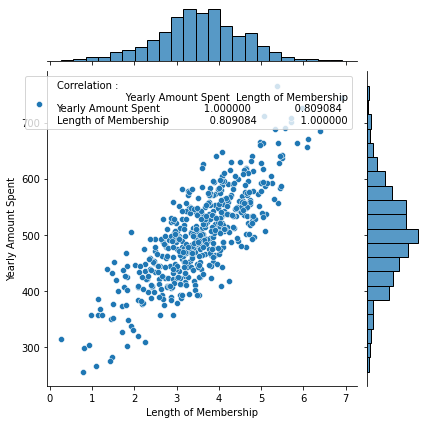

In [23]:
lab = df[['Yearly Amount Spent','Length of Membership']].corr()
sns.jointplot(x='Length of Membership',y ='Yearly Amount Spent', data = df,label = f'Correlation : \n{lab}')

* There is a very good correlation of 0.80
* we can definately see a good line.

## Multicolinearity

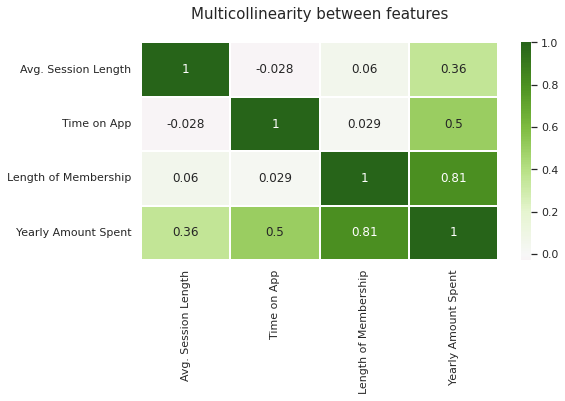

In [24]:
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.9,
            center=0,
            cbar=True,
            cmap="PiYG")
plt.title('Multicollinearity between features\n', fontsize = 15)
plt.show()

* We definately see a good correlation of all features with target.
* We also see no correlation among other features which a very good sign.

## Avatar Onehot Encoading

In [25]:
df = pd.get_dummies(df,columns=['Avatar'])
df

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent,Avatar_AliceBlue,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,...,Avatar_Teal,Avatar_Thistle,Avatar_Tomato,Avatar_Turquoise,Avatar_Violet,Avatar_Wheat,Avatar_White,Avatar_WhiteSmoke,Avatar_Yellow,Avatar_YellowGreen
0,34.497268,12.655651,4.082621,587.951054,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,31.926272,11.109461,2.664034,392.204933,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.000915,11.330278,4.104543,487.547505,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.305557,13.717514,3.120179,581.852344,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.330673,12.795189,4.446308,599.406092,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,33.237660,13.566160,3.746573,573.847438,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,34.702529,11.695736,3.576526,529.049004,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,32.646777,11.499409,4.958264,551.620145,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,33.322501,12.391423,2.336485,456.469510,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


* All the values are now numbers in our data.
* Now to the modeling process.

# Model Building.

## Split and Scale.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
x = df.drop(columns=['Yearly Amount Spent'])
y = df['Yearly Amount Spent']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20)
x_train.head()

,Avg. Session Length,Time on App,Length of Membership,Avatar_AliceBlue,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,Avatar_Bisque,...,Avatar_Teal,Avatar_Thistle,Avatar_Tomato,Avatar_Turquoise,Avatar_Violet,Avatar_Wheat,Avatar_White,Avatar_WhiteSmoke,Avatar_Yellow,Avatar_YellowGreen
202,31.525752,11.340036,3.811248,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
69,32.179100,11.187539,3.552650,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
483,33.606851,12.214074,2.905238,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,33.612563,11.470565,3.802511,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,34.447871,10.607724,3.366464,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [30]:
for i in range(2,15):
  reg_model=LinearRegression()
  reg_model.fit(x_train,y_train)
  s = np.mean(cross_val_score(reg_model, x_train, y_train, cv = i)) # mean cv_score
  t = reg_model.score(x_train,y_train)
  print(i,t,s)

2 0.9889414190809495 -5.605856388645381e+27
3 0.9889414190809495 -7.065471261616819e+26
4 0.9889414190809495 -6.0952106962370865e+26
5 0.9889414190809495 -6.893568420255759e+26
6 0.9889414190809495 -1.8594482981918305e+26
7 0.9889414190809495 -1.4057667612148314e+26
8 0.9889414190809495 -4.3007018193288894e+26
9 0.9889414190809495 -8.920413388567687e+26
10 0.9889414190809495 -2.9064773775553638e+26
11 0.9889414190809495 -3.3415081216768425e+26
12 0.9889414190809495 -2.413217752121607e+26
13 0.9889414190809495 -1.253997519081753e+26
14 0.9889414190809495 -1.226932736562173e+27


* irrespective of the kfolds the training score remained same and positive.
* but the cv score has been a negative all the time.

In [31]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)
s = np.mean(cross_val_score(reg_model, x_train, y_train, cv = 12))
print(s)

-2.413217752121607e+26


* since this was the lowest train error.
* we are fitting with the same.

In [32]:
reg_pred=reg_model.predict(x_test)

In [33]:
score=r2_score(reg_pred,y_test)
score

-0.040864457426316836

* This clearly explains there has been an over fit to our data.
* this was a pure doubt when the cv score was negative and the train was 99% 
* still this is a simplest regression and we have a lot of features on colours. we need to build a model that can go with feature tollerance.
* we will use the lasso regression which take absolute errors to build the lambda.

## lasso Regression.

In [34]:
lasso=Lasso()

In [35]:
parameters={'alpha':np.arange(0.01, 2, 0.01)}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=12)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=12, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0...
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99])},
             scoring='neg_mean_squared_error')

In [36]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 0.85}
-106.01452113863327


In [37]:
lasso_pred=lassocv.predict(x_test)

In [38]:
score=r2_score(lasso_pred,y_test)
score

0.9865490069064269

* Thats the best model yet.
* so when the slopes are taken as absolute and multiplied with a introduced bias(lambda) the redundent features are ignored.
* for the previous model this is a very satisfying perfomance.

## Ridge Regression

In [39]:
ridge_regressor=Ridge()

In [40]:
parameters={'alpha':np.arange(0.01, 3, 0.01)}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=12)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=12, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0...
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])},
             scoring='neg_mean_squared_error')

In [41]:
print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 2.4299999999999997}
-154.50333536464538


In [42]:
ridge_pred=ridgecv.predict(x_test)
score=r2_score(ridge_pred,y_test)
score

0.9823541258139881

* Thus we have a better perfomance in squired slopes too.
* Still not the best model yet.

# Conclution : -

Overall, the analysis of the dataset revealed that certain features, such as "Length of Membership," had a strong positive correlation with the target variable. On the other hand, other features, such as "Time on Website," were found to have no correlation and were removed from the analysis. The feature avatar had 138 unique values which is very large for a 500 sample data, but the grouped count values still contributed uniformly with sales. which explained the importance of the feature. When applying different regression models to the data, the Lasso model was found to have the best performance, with a score of 0.9865. These results suggest that the Lasso model may be a good choice for predicting the target variable in this dataset. The data was limited to not haveing the information of problem discription. for instance, on which area the insight is to be generated but as on the analysis a good membership (had a corr of 0.8) is the factor increasing amount spent. thus the business should focus on increasing memberships.